In [1]:
# import some general scientific Python libraries
import matplotlib.pyplot as plt
#from matplotlib import tri
import numpy as np

# import required PyRockWave modules
import elastic_database as edb
import orthotropic_models as om
import coordinates as c

Mineral Elastic Database v.2024.2.01 imported


In [2]:
olivine = edb.forsterite_Mao()
olivine

<class 'ElasticClass.ElasticProps'>

Mineral Name: Forsterite
Reference Source: https://doi.org/10.1016/j.epsl.2015.06.045
Crystal System: Orthorhombic
Pressure (GPa): 0.0
Temperature (°C): 627
Density (g/cm3): 3.246

Elastic Tensor (Cij) in GPa:
[[296.02  38.36  58.15   0.     0.     0.  ]
 [ 38.36 179.72  75.03   0.     0.     0.  ]
 [ 58.15  75.03 210.01   0.     0.     0.  ]
 [  0.     0.     0.    56.42   0.     0.  ]
 [  0.     0.     0.     0.    71.04   0.  ]
 [  0.     0.     0.     0.     0.    71.01]]

Tensor decomposition (Browaeys & Chevrot approach):
    Isotropy = 73.6 %
    Anisotropy = 26.4 %

Anisotropy indexes:
    Universal Elastic Anisotropy:           0.342
    Kube's Anisotropy Index (proportional): 0.139

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt       114.314         73.975          0.234
    Hill       112.838         71.777          0.238
   Reuss       111.361         69.579          0.241

Isotropic

In [3]:
# generate a set of equispaced wavevectors
wavevectors = c.equispaced_S2_grid(n=10000, hemisphere='upper')

In [4]:
# apply the Hao and Stovas (2016) model for azimuthal orthotropic anisotropy
model = om.orthotropic_azimuthal_anisotropy(olivine, wavevectors)
model

,polar_ang,azimuthal_ang,Vp
0,0.000000,0.000000,8.043512
1,0.044706,0.000000,8.163146
2,0.046889,3.883222,8.159739
3,0.048974,1.483259,8.122468
4,0.050974,5.366481,8.159895
...,...,...,...
9995,1.570347,3.968985,9.071964
9996,1.570447,1.569022,7.440895
9997,1.570547,5.452244,9.065131
9998,1.570646,3.052281,9.550504


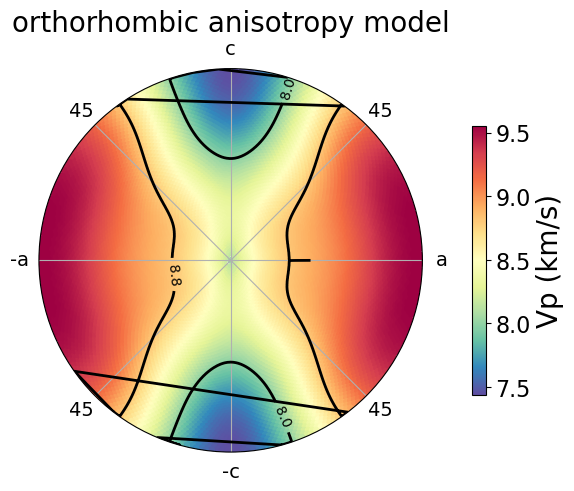

In [5]:
fig1, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True)

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['a', '45', '-c', '45', '-a', '45', 'c', '45'], fontsize=14)
ax.set_yticks([])
ax.set_title('orthorhombic anisotropy model', fontsize=20)

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig1.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# rough contour (artifact, see https://github.com/matplotlib/matplotlib/issues/19492)
cs = ax.tricontour(model['azimuthal_ang'],
                   model['polar_ang'],
                   model['Vp'],
                   levels=2,
                   linestyles="solid", colors="k", linewidths=2.0)
_ =ax.clabel(cs, cs.levels, inline=True, fontsize=10)

In [6]:
# set a custom style for plots
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15

In [7]:
# generate profiles
latitudes = np.radians(np.arange(0, 91))
azimuths = np.radians(np.arange(0, 361))
axial_profile1 = np.full_like(latitudes, fill_value=np.pi/2), latitudes
axial_profile2 = np.zeros_like(latitudes), latitudes
azimuthal_profile = azimuths, np.full_like(azimuths, fill_value=np.pi/2)

# calculate seismic properties along profiles
axial_props1 = om.orthotropic_azimuthal_anisotropy(olivine, axial_profile1)
axial_props2 = om.orthotropic_azimuthal_anisotropy(olivine, axial_profile2)
azimuthal_props = om.orthotropic_azimuthal_anisotropy(olivine, azimuthal_profile)

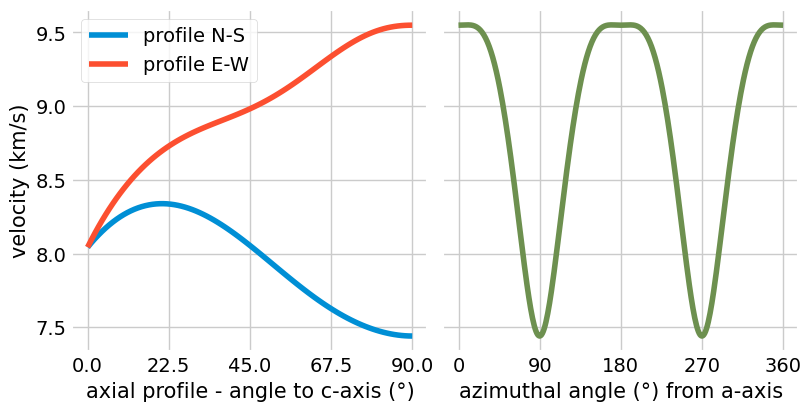

In [8]:
fig2, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2, sharey=True, constrained_layout=True)

# average polar Vp velocities (grouped and averaged by latitude angle)
ax1.plot(np.rad2deg(axial_props1['polar_ang']), axial_props1['Vp'], label='profile N-S')
ax1.plot(np.rad2deg(axial_props2['polar_ang']), axial_props2['Vp'], label='profile E-W')
ax1.set_ylabel('velocity (km/s)', fontsize=15)
ax1.set_xlabel('axial profile - angle to c-axis (°)', fontsize=15)
ax1.set_xticks([0,22.5,45,67.5,90])
ax1.legend()

# azimuthal (latitude == 0) Vp velocities 
ax2.plot(np.rad2deg(azimuthal_props['azimuthal_ang']), azimuthal_props['Vp'], color='C3')
ax2.set_xlabel('azimuthal angle (°) from a-axis', fontsize=15)
_ = ax2.set_xticks([0,90,180,270,360])


In [9]:
import sys
import matplotlib as mpl
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2024-04-24 using:
Python 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.4
Matplotlib 3.8.4
